# Importing Libraries for Project
# ------------------------------------------

In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from PIL import Image
from skimage import feature as detector
import joblib

# Dataset Loading
# ------------------------

In [2]:
hog_features_list = []
labels = []

healthy_dir = '/kaggle/input/braintumor-dataset/Dataset/Healthy'
healthy_image_paths = [os.path.join(healthy_dir, file) for file in os.listdir(healthy_dir) ]

cancer_dir = '/kaggle/input/braintumor-dataset/Dataset/Tumor'
cancer_image_paths = [os.path.join(cancer_dir, file) for file in os.listdir(cancer_dir) ]

In [3]:
print(len(cancer_image_paths))
global hog_features_list

621


# Preprocessing and Feature Extraction
# ----------------------------------------

In [4]:
def extract_hog_features(image):
    features, _ = hog(image, orientations=8, pixels_per_cell=(12, 12), cells_per_block=(2, 2), block_norm='L2-Hys', visualize=True)
    hog_features_list.append(features)
    

def resize_image(image, target_size=(324, 324)):
    return cv2.resize(image, target_size)

print("Loading Images....")

for image_path in cancer_image_paths:
    image = cv2.imread(image_path)
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    image = cv2.GaussianBlur(image, (3, 3), 0)
    image = cv2.resize(image, (324, 324)) 
    extract_hog_features(image)
    labels.append(1)

print("\nLoading Images....")
for image_path in healthy_image_paths:
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    image = cv2.GaussianBlur(image, (3, 3), 0)
    image = cv2.resize(image, (324,324)) 
    extract_hog_features(image)
    labels.append(0)




Loading Images....

Loading Images....


# Splitting the dataset

In [5]:
 # Split the data
X_train, X_test, y_train, y_test = train_test_split(hog_features_list, labels, test_size=0.2, random_state=42)



# Training and Testing Dataset
# -------------------------------

In [6]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

1034
1034
259
259


# Support Vector Machine Classifier
# -------------------------------------

In [7]:
print("\nTraining Model....")
# Train an SVM classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = svm_model.predict(X_test)
print("Model Trained")


Training Model....
Model Trained


# **Results and Evaluations**
# ------------------------------------------

Evaluating....
Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1 Score: 0.95


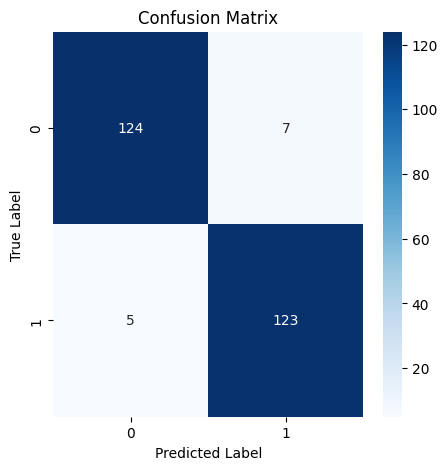

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns


print("Evaluating....")
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Display confusion matrix using seaborn
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [9]:
joblib.dump(svm_model, 'svm_model.joblib')

['svm_model.joblib']

# Comparsion with CNN
# ------------------------------------

Epoch 1/10
26/26 [==============================] - 11s 383ms/step - loss: 0.5486 - accuracy: 0.7304 - val_loss: 0.5124 - val_accuracy: 0.7150
Epoch 2/10
26/26 [==============================] - 10s 380ms/step - loss: 0.4133 - accuracy: 0.8053 - val_loss: 0.3466 - val_accuracy: 0.8502
Epoch 3/10
26/26 [==============================] - 10s 377ms/step - loss: 0.2802 - accuracy: 0.8839 - val_loss: 0.2955 - val_accuracy: 0.8744
Epoch 4/10
26/26 [==============================] - 10s 376ms/step - loss: 0.2074 - accuracy: 0.9154 - val_loss: 0.4622 - val_accuracy: 0.8164
Epoch 5/10
26/26 [==============================] - 10s 381ms/step - loss: 0.1374 - accuracy: 0.9565 - val_loss: 0.2269 - val_accuracy: 0.9130
Epoch 6/10
26/26 [==============================] - 10s 380ms/step - loss: 0.1700 - accuracy: 0.9407 - val_loss: 0.2696 - val_accuracy: 0.8696
Epoch 7/10
26/26 [==============================] - 10s 375ms/step - loss: 0.0777 - accuracy: 0.9758 - val_loss: 0.2124 - val_accuracy: 0.9130

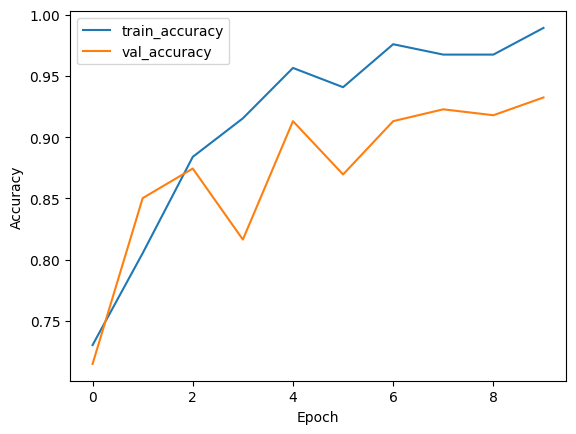

In [11]:
#For Comparison using CNN

import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Function to load and preprocess images
def load_images(directory, label):
    images = []
    labels = []
    for filename in os.listdir(directory):
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
            img = cv2.resize(img, (128, 128))  
            images.append(img)
            labels.append(label)
    return images, labels

# Load tumor images
tumor_dir = '/kaggle/input/braintumor-dataset/Dataset/Tumor'
tumor_images, tumor_labels = load_images(tumor_dir, 1)


non_tumor_dir ='/kaggle/input/braintumor-dataset/Dataset/Healthy'
non_tumor_images, non_tumor_labels = load_images(non_tumor_dir, 0)

all_images = tumor_images + non_tumor_images
all_labels = tumor_labels + non_tumor_labels


all_images = np.array(all_images)
all_labels = np.array(all_labels)

X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)

X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)


test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.2f}')

# Plot training history
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
